## Ejercicio de codificación #0405

### 1. Regresión lineal con datos de 'Galton':

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### 1.1. Leer datos y visualizar:

In [2]:
# Ir al directorio que contiene el fichero 
# os.chdir(r'~~')                # Reemplazar por la ruta adecuada.   

In [2]:
df = pd.read_csv('data_galton.csv', header='infer')

In [3]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [4]:
# Hay muchos valores repetidos.
# Por lo que resumimos con una tabla cruzada.
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [5]:
# Transforme la tabla cruzada para que pueda mostrarse como un diagrama de dispersión.
# Tamaño del punto = Frecuencia.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

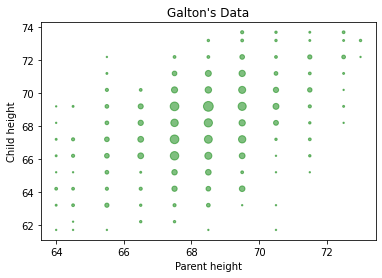

In [6]:
# Muestra el diagrama de dispersión.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Entrenamiento de regresión lineal:

In [33]:
# Crea una instancia de un objeto de regresión lineal.
from sklearn.linear_model import LinearRegression
m = len(y)
X = np.vstack((np.ones(m), df.parent)).T
Y = np.vstack((np.ones(m), df.child)).T
reg = LinearRegression().fit(X,Y)
reg.intercept_

array([ 1.        , 23.94153018])

In [7]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)
reg = LinearRegression().fit(X,Y)
reg.intercept_

array([46.13534986])

In [8]:
# Entrenamiento.
Y_pred = reg.predict(X)  # make predictions
Y_pred

array([[66.22780044],
       [66.22780044],
       [66.22780044],
       [66.22780044],
       [66.22780044],
       [66.39062419],
       [66.39062419],
       [66.39062419],
       [66.39062419],
       [66.39062419],
       [66.39062419],
       [66.39062419],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [66.71627169],
       [67.04191919],
       [67

In [9]:
# Muestra la intersección.
Y_pred.min()

66.22780044417469

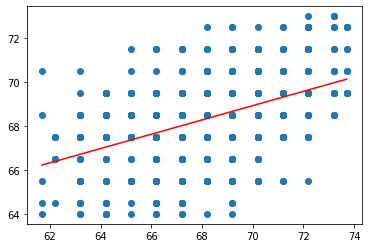

In [10]:
# Muestra la pendiente.
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#### 1.3. Visualización de la línea de regresión:

In [ ]:
# Y predicho.


In [ ]:
# Muestra el diagrama de dispersión + línea de regresión.
